# Simple Pendulum Phase Space

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy import constants

In [3]:
g = constants.g

### Phase Space Grid 

In [4]:
n_theta = n_omega = 100

# Defining the space grid
theta = np.linspace(-4*np.pi, 4*np.pi, n_theta)
omega = np.linspace(-10, 10, n_omega)

# Setting up the grid
mesh_theta, mesh_omega = np.meshgrid(theta, omega)

### Calculating Hamiltonian 

For the simple pendulum, the hamiltonian can be written as 

$ \mathcal{H} = T + V$

In [5]:
def T(w, **system):
    return system["m"] * (system["l"] ** 2) * (w ** 2) / 2

In [6]:
def V(theta, **system):
    return system["m"] * system["g"] * system["l"] * (1 - np.cos(theta))

In [7]:
system = {"m": 1, "g": g, "l": 1}

In [8]:
H = T(mesh_omega, **system) + V(mesh_theta, **system)

### Plotting the Phase Space 

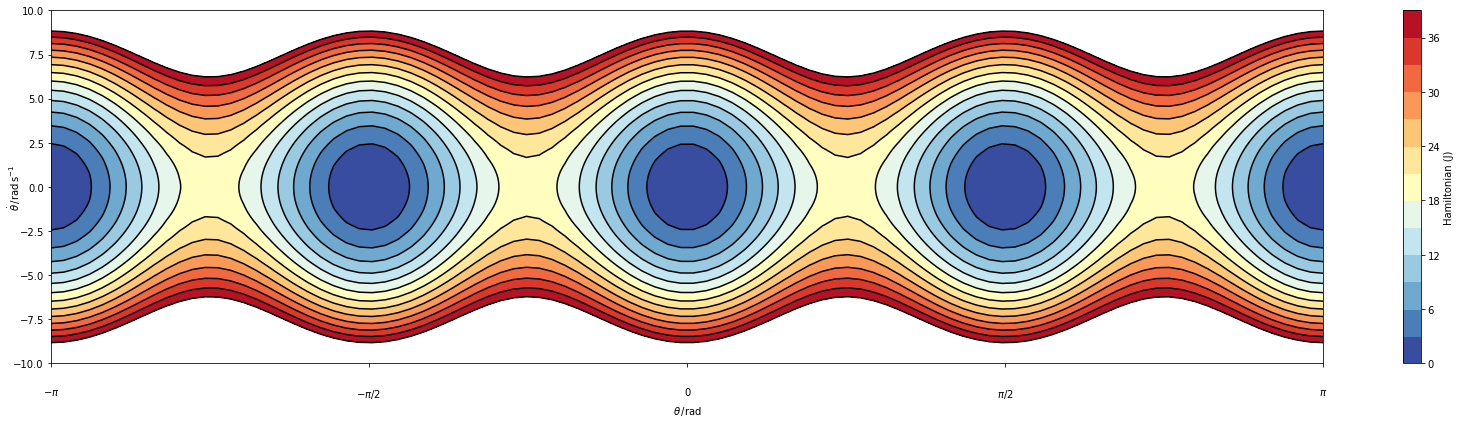

In [9]:
levels = np.arange(0, 40, 3)

fig, ax = plt.subplots(figsize=(23,6))

plt.contour(theta, omega, H, levels=levels, colors='k')
cs = plt.contourf(theta, omega, H, levels=levels, cmap=mpl.cm.RdYlBu_r)

ax.set_xlabel(r'$\theta\,/\mathrm{rad}$')
ax.set_xticks(np.linspace(-4*np.pi, 4*np.pi, 5))
ax.set_xticklabels((r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'))
ax.tick_params(axis='x', which='major', pad=20)
ax.set_ylabel(r'$\dot{\theta}\,/\mathrm{rad\,s^{-1}}$', labelpad=-10)

cbar = plt.colorbar()
cbar.set_label('Hamiltonian (J)')
plt.tight_layout()
plt.show()